In [ ]:
import os

ROOT = "/content/drive/MyDrive/001_SUNNY_BHAVEEN_CHANDRA/001_My_Classes/FSDS_Feb_Batch/ALL_NOTES/Day-14"
os.chdir(ROOT)

In [ ]:
car_img_path = "car1.jpeg"

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
def read_img(path, grayscale=True):
  img = cv2.imread(path)
  if grayscale:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img,cmap="gray")
    return img
  from google.colab.patches import cv2_imshow
  cv2_imshow(img)
  return img

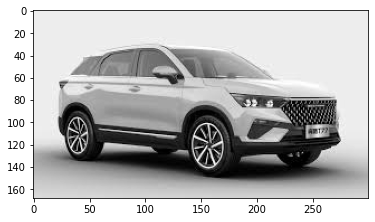

In [ ]:
car = read_img(car_img_path)

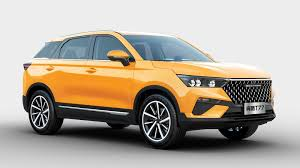

In [ ]:
color_car = read_img(car_img_path, grayscale=False)

In [ ]:
car.shape

(168, 300)

In [ ]:
color_car.shape

(168, 300, 3)

In [ ]:
# (1,r,c,1)
row,col = car.shape
car = car.reshape(1,row,col,1) # grayscale
# color_car = color_car.reshape(1,row,col,3) # colored
car.shape

(1, 168, 300, 1)

In [ ]:
CONV_LAYER = [tf.keras.layers.Conv2D(filters=1, 
                                    kernel_size=(3,3), 
                                    strides=(1,1),
                                    input_shape=car.shape[1:])]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 166, 298, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
3*3 + 1

10

In [ ]:
out = conv_model.predict(car)

In [ ]:
out.shape

(1, 166, 298, 1)

In [ ]:
(168 - 3 + 0)//1 + 1

166

In [ ]:
(300 - 3 + 0)//1 + 1


298

In [ ]:
row, col = out.shape[1:-1]
reshape_out = out.reshape(row, col)

In [ ]:
reshape_out.shape

(166, 298)

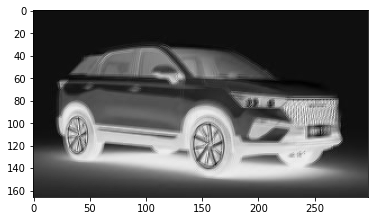

In [ ]:
plt.imshow(reshape_out, cmap="gray")

## For color image

In [ ]:
# (1,r,c,1)
row,col,depth = color_car.shape
# car = car.reshape(1,row,col,1) # grayscale
color_car = color_car.reshape(1,row,col,depth) # colored
color_car.shape

(1, 168, 300, 3)

In [ ]:
CONV_LAYER = [tf.keras.layers.Conv2D(filters=1, 
                                    kernel_size=(3,3), 
                                    strides=(1,1),
                                    input_shape=color_car.shape[1:])]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [ ]:
3*3*3 + 1

28

In [ ]:
out = conv_model.predict(color_car)

In [ ]:
out.shape

(1, 166, 298, 1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
(168 - 3 + 0)//1 + 1

166

In [ ]:
(300 - 3 + 0)//1 + 1


298

In [ ]:
row, col = out.shape[1:-1]
reshape_out = out.reshape(row, col)

In [ ]:
reshape_out.shape

(166, 298)

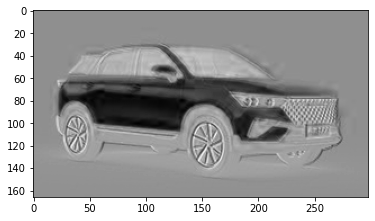

In [ ]:
plt.imshow(reshape_out, cmap="gray")